In [ ]:
!pip install --upgrade -q kaggle 
!mkdir /root/.kaggle
import json 
token = {
    
    "username": "ifrahandleeb",
    "key": "7d32d51ce48e80317141c1a4fc7c3c23"
    
}

with open('/root/.kaggle/kaggle.json' , 'w') as config_file:

  json.dump(token , config_file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d preetviradiya/covid19-radiography-dataset

 99% 741M/747M [00:03<00:00, 202MB/s]
100% 747M/747M [00:04<00:00, 195MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/covid19-radiography-dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls /content/COVID-19_Radiography_Dataset

COVID-19_Radiography_Dataset


In [ ]:
!ls /content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset

 COVID	 Lung_Opacity   Normal	'Viral Pneumonia'


In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio("/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset",output='data',seed=1337,ratio=(0.8,0.2))

Copying files: 21165 files [00:05, 3669.75 files/s]


In [ ]:
!ls /content/data

train  val


In [ ]:
!ls /content/data/train

 COVID	 Lung_Opacity   Normal	'Viral Pneumonia'


In [ ]:
!ls /content/data/val


 COVID	 Lung_Opacity   Normal	'Viral Pneumonia'


In [ ]:
import os 
for dirpath , dirnames , filenames in os.walk("data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in data
there are 4 directories and 0 images in data/val
there are 0 directories and 2039 images in data/val/Normal
there are 0 directories and 269 images in data/val/Viral Pneumonia
there are 0 directories and 724 images in data/val/COVID
there are 0 directories and 1203 images in data/val/Lung_Opacity
there are 4 directories and 0 images in data/train
there are 0 directories and 8153 images in data/train/Normal
there are 0 directories and 1076 images in data/train/Viral Pneumonia
there are 0 directories and 2892 images in data/train/COVID
there are 0 directories and 4809 images in data/train/Lung_Opacity


In [ ]:
import pathlib 
import numpy as np 
data_dir = pathlib.Path("data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[0:]
print(class_names)

['COVID' 'Lung_Opacity' 'Normal' 'Viral Pneumonia']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir , target_class):

  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape : {img.shape}")

  return img

In [ ]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "COVID")

NameError: ignored

['Lung_Opacity-5609.png']
image shape : (299, 299)


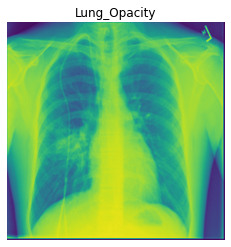

In [ ]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "Lung_Opacity")

['Normal-3378.png']
image shape : (299, 299)


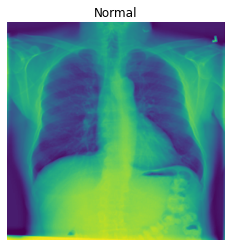

In [ ]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "Normal")

['Viral Pneumonia-226.png']
image shape : (299, 299, 3)


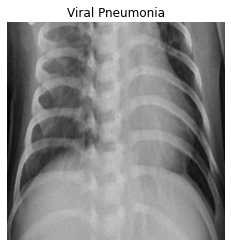

In [ ]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "Viral Pneumonia")

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/data/train"
val_dir = "/content/data/val"

train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               batch_size = 32 , 
                                               target_size=(224 , 224) , 
                                               class_mode= "categorical" ,
                                               seed=42)

val_data = val_datagen.flow_from_directory(directory = val_dir , 
                                               batch_size = 32 , 
                                               target_size=(224 , 224) , 
                                               class_mode= "categorical" ,
                                               seed=42)

Found 16930 images belonging to 4 classes.
Found 4235 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPool2D , Activation , Dense , Flatten
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential ([
                       Conv2D(10 , 3 , activation="relu" ) ,
                       MaxPool2D() ,  
                       Conv2D(10 , 3 , activation="relu") ,
                       MaxPool2D() ,
                       Conv2D(10 , 3 , activation="relu") , 
                       Flatten(), 
                       Dense(4 , activation="sigmoid")
                       
])

In [ ]:
model.compile(loss = "categorical_crossentropy" , 
              optimizer = Adam() , 
              metrics = ["accuracy"])

In [ ]:
history = model.fit(train_data , 
            epochs=5 , 
            steps_per_epoch=len(train_data) , 
            validation_data=val_data , 
            validation_steps=len(val_data))

Epoch 1/5
530/530 [==============================] - 70s 128ms/step - loss: 0.7165 - accuracy: 0.7148 - val_loss: 0.6765 - val_accuracy: 0.7367
Epoch 2/5
530/530 [==============================] - 67s 127ms/step - loss: 0.5463 - accuracy: 0.7904 - val_loss: 0.5226 - val_accuracy: 0.8017
Epoch 3/5
530/530 [==============================] - 68s 128ms/step - loss: 0.4537 - accuracy: 0.8245 - val_loss: 0.4971 - val_accuracy: 0.8177
Epoch 4/5
530/530 [==============================] - 67s 127ms/step - loss: 0.3829 - accuracy: 0.8575 - val_loss: 0.4781 - val_accuracy: 0.8300
Epoch 5/5
530/530 [==============================] - 67s 127ms/step - loss: 0.3288 - accuracy: 0.8760 - val_loss: 0.4612 - val_accuracy: 0.8298


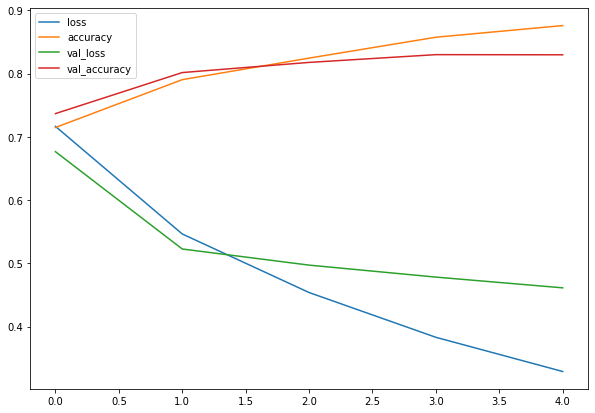

In [ ]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(10 , 7)) ;

In [ ]:
def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs , loss  , label="Training Loss")
  plt.plot(epochs , val_loss , label="Val Loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs , loss  , label="Training Accuracy")
  plt.plot(epochs , val_loss , label="Val Accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

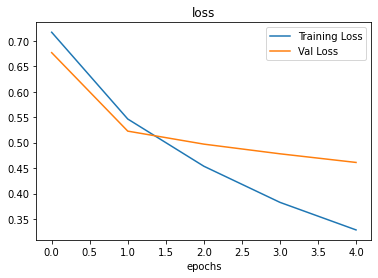

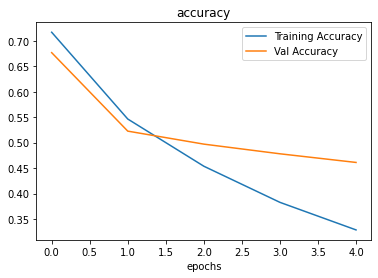

In [ ]:
plot_loss_curves(history)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 10)    280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 10)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 10)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 10)    910       
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1

In [ ]:
train_datagen_augmented = ImageDataGenerator(
                                             rescale= 1/255 , 
                                             rotation_range = 0.2 , 
                                             shear_range = 0.2 , 
                                             zoom_range = 0.2 , 
                                             width_shift_range = 0.2 , 
                                             height_shift_range = 0.3 , 
                                             horizontal_flip = True
)

train_datagen = ImageDataGenerator(rescale=1/255)

val_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(   train_dir , 
                                                                      target_size = (224 , 224) , 
                                                                      batch_size = 32 , 
                                                                      class_mode = "categorical" , 
                                                                      shuffle= False)

Found 16930 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

showing image number : 7


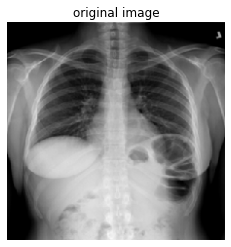

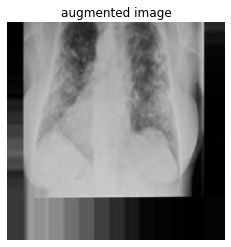

In [ ]:
import random 
random_number = random.randint(0 , 32)
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False);


In [ ]:
aug_model = Sequential([
                        Conv2D(10 , 3 , activation="relu") , 
                        MaxPool2D() , 
                        Conv2D( 10 , 3 , activation = "relu") , 
                        MaxPool2D() , 
                        Conv2D(10 , 3 , activation= "relu") , 
                        MaxPool2D() , 
                        Flatten() , 
                        Dense( 4 , activation="softmax")
])

In [ ]:
aug_model.compile(loss = "categorical_crossentropy" , 
                  optimizer = Adam() , 
                  metrics = ["accuracy"])

In [ ]:
aug_history = aug_model.fit( train_data_augmented , 
                            epochs = 5 , 
                            steps_per_epoch = len(train_data_augmented) , 
                            validation_data = val_data , 
                            validation_steps = len(val_data) 
                            )

Epoch 1/5
530/530 [==============================] - 230s 432ms/step - loss: 1.2073 - accuracy: 0.4745 - val_loss: 1.1611 - val_accuracy: 0.4954
Epoch 2/5
530/530 [==============================] - 231s 437ms/step - loss: 1.1191 - accuracy: 0.5027 - val_loss: 1.0017 - val_accuracy: 0.5842
Epoch 3/5
530/530 [==============================] - 229s 432ms/step - loss: 1.0367 - accuracy: 0.5467 - val_loss: 0.9659 - val_accuracy: 0.5865
Epoch 4/5
530/530 [==============================] - 230s 435ms/step - loss: 0.9933 - accuracy: 0.5764 - val_loss: 0.9362 - val_accuracy: 0.6371
Epoch 5/5
530/530 [==============================] - 231s 437ms/step - loss: 0.9440 - accuracy: 0.6067 - val_loss: 1.0120 - val_accuracy: 0.5379


In [ ]:
model.evaluate(val_data)

133/133 [==============================] - 13s 97ms/step - loss: 0.4612 - accuracy: 0.8298


[0.4611765146255493, 0.8297520875930786]

In [ ]:
aug_model.evaluate(val_data)

133/133 [==============================] - 13s 95ms/step - loss: 1.0120 - accuracy: 0.5379


[1.0120395421981812, 0.5378984808921814]

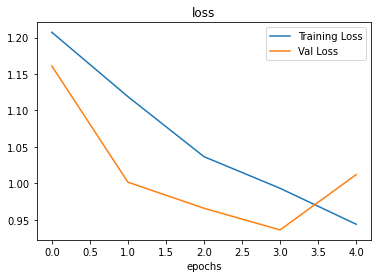

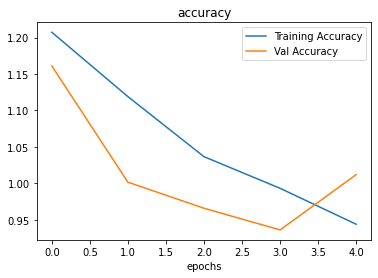

In [ ]:
plot_loss_curves(aug_history)

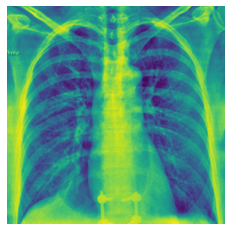

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_img = mpimg.imread("covid-test.png")
plt.imshow(test_img)
plt.axis(False);

In [ ]:
def load_and_prep_image(filename , img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img , size = [img_shape , img_shape])
  img = img/225
  return img

In [ ]:
test_img = load_and_prep_image("covid-test.png")
test_img

<tf.Tensor: shape=(224, 224, 1), dtype=float32, numpy=
array([[[0.601239  ],
        [0.5922421 ],
        [0.5899835 ],
        ...,
        [0.6072764 ],
        [0.61145836],
        [0.6341364 ]],

       [[0.6318949 ],
        [0.6089186 ],
        [0.6044675 ],
        ...,
        [0.613743  ],
        [0.6011706 ],
        [0.59411037]],

       [[0.6489055 ],
        [0.6366864 ],
        [0.61143166],
        ...,
        [0.62319887],
        [0.6371461 ],
        [0.6312498 ]],

       ...,

       [[0.69758064],
        [0.67253363],
        [0.7156197 ],
        ...,
        [0.88078445],
        [0.7956315 ],
        [0.7451976 ]],

       [[0.70409054],
        [0.6977283 ],
        [0.704524  ],
        ...,
        [0.8832921 ],
        [0.79561496],
        [0.7507598 ]],

       [[0.674123  ],
        [0.7118817 ],
        [0.71378577],
        ...,
        [0.8838951 ],
        [0.7974735 ],
        [0.75261825]]], dtype=float32)>

In [ ]:
test_img.shape

TensorShape([224, 224, 1])

In [ ]:
model.save('my_model.h5')